In [ ]:
from DepresssionModel import DepressionModel
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [20]:
n = 10  # number of nodes
G = nx.watts_strogatz_graph(n=n, k=4, p=0.1)

# Define proportions
initial_probs = [0.85, 0.10, 0.05]  # [Healthy, Mild, Depressed]
initial_states = np.random.choice([0, 1, 2], size=n, p=initial_probs)

# Assign to nodes as 'd_state_ego'
nx.set_node_attributes(G, {i: {'d_state_ego': int(state)} for i, state in enumerate(initial_states)})


In [21]:
depression_class = DepressionModel(G)
depression_class.simulate(400)

state_history = depression_class.its['states']

100%|██████████| 400/400 [00:00<00:00, 6792.12it/s]


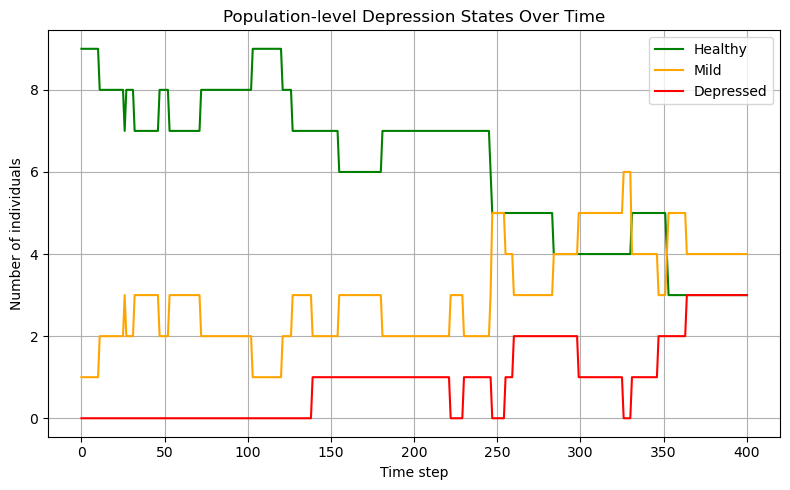

In [22]:
timesteps = sorted(state_history.keys())
n_steps = len(timesteps)

# Initialize counters
H = []
M = []
D = []

# Count how many nodes are in each state at every time step
for t in timesteps:
    state = state_history[t]
    H.append(np.count_nonzero(state == 0))
    M.append(np.count_nonzero(state == 1))
    D.append(np.count_nonzero(state == 2))

# Plot
plt.figure(figsize=(8, 5))
plt.plot(H, label="Healthy", color="green")
plt.plot(M, label="Mild", color="orange")
plt.plot(D, label="Depressed", color="red")
plt.xlabel("Time step")
plt.ylabel("Number of individuals")
plt.title("Population-level Depression States Over Time")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()